# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [104]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [105]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   9413  8259     5126     666              1795          1451
1   6269  1095     1980    3860               609          2162
2  11594  7779    12144    3252              8035          3029

Chosen samples offset from mean of dataset:


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0 -2587.0  2463.0  -2825.0 -2406.0           -1086.0         -74.0
1 -5731.0 -4701.0  -5971.0   788.0           -2272.0         637.0
2  -406.0  1983.0   4193.0   180.0            5154.0        1504.0

Chosen samples offset from median of dataset:


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   909.0  4632.0    370.0  -860.0             979.0         485.0
1 -2235.0 -2532.0  -2776.0  2334.0            -207.0        1196.0
2  3090.0  4152.0   7388.0  1726.0            7219.0        2063.0

Quartile Visualization


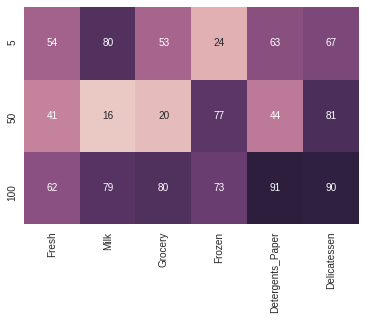

In [106]:
import seaborn as sns


# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [5,50,100]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

print "Chosen samples offset from mean of dataset:"
display(samples - np.around(data.mean().values))

print "Chosen samples offset from median of dataset:"
display(samples - np.around(data.median().values))

print "Quartile Visualization"

percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
sns.heatmap(percentiles, vmin=1, cbar = False, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:

iNDEX 5[0]- This is representing probably a Retailer/Supermarket. This assumption is based on the high usage of milk (Milk is significantly higher than Mean/Median value) and moderate use of Delicatessen products,Grocerry and Fresh items (closer to Median value).


iNDEX 50[1]- This is representing probably a  Restaurant. Mostly consumes Fresh and Frozen items along with Delicatessen products. However, it consumes other items in low quantity as well.

iNDEX 100[2]-This is representing probably a Retailer/super market. Mean and Median value shows significantly high consumption of all items.
**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [108]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'],axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'],test_size=0.25, random_state=25)


# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 25)
regressor.fit (X_train,y_train)
               
# TODO: Report the score of the prediction using the testing set
score = regressor.score (X_test,y_test)

print "Score : {:.3f}" .format(score)             

Score : 0.745


In [ ]:
**


Detergents_Paper - 0.745
Frozen - 0.029
Grocery -0.811
Milk - 0.045
Fresh- '-0.821'
Delicatessan - '-2.70'

**

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer: 

I'm selecting Detergents_Paper. Though it's a random choice, reason of selection is - it's not a food item. :-)

However, I've tried all 6 features and the prediction scores are as follow-

Detergents_Paper - 0.745

Frozen - 0.029

Grocery- 0.811

Milk - 0.045

Fresh- '-0.821'

Delicatessan - '-2.70'

Detergents_Paper and Grocery are nearly perfect fit to the model. On the other hand, Fresh and Delicatessen are not fit for the model. Frozen items has low R^2 score (.029). 

So, both Detergents_Paper and Grocery are correlated to other items and can be removed either of them. On the other hand, Fresh and Delicatessen products does not fit to the model;hence, these are more critical to identify customers.Frozen items are also very critical considering it's low R^2 score.

**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

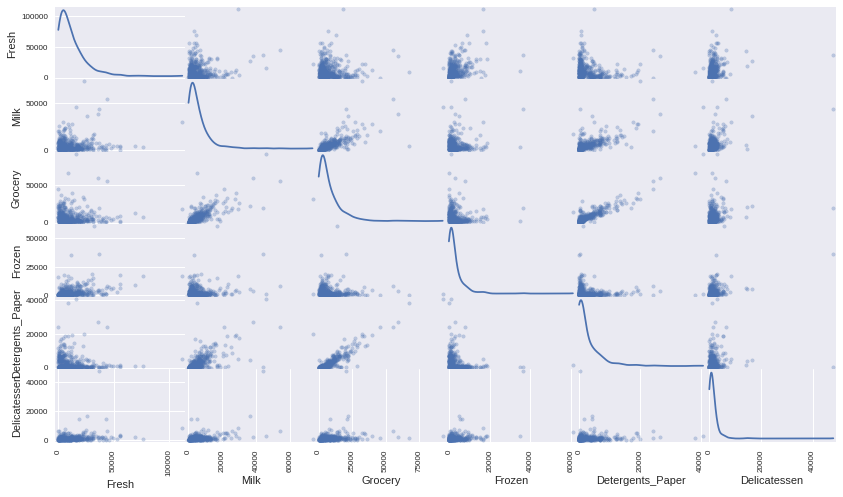

In [109]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

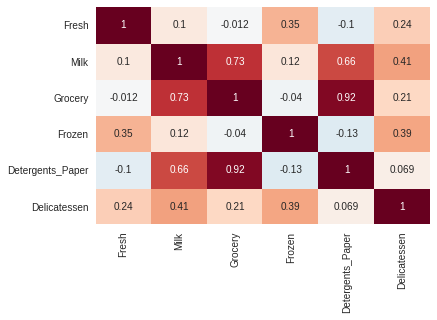

In [110]:
sns.heatmap(data.corr(), annot=True,cbar = False)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:
There are three pairs which show the correlation-

1. Detegents_paper- Grocery - Linear correlation exists.However, data is positively skewed. Correlation coefficient is 0.92.
2. Detegents_paper -Milk - Linear correlation exists.However, data is positively skewed.Correlation coefficient is 0.66.
3. Milk-Grocerry -Linear correlation exists.However, data is positively skewed.Correlation coefficient is 0.73.

Detergents_paper matched with the previous selection. Detergents_paper has strong correlation with Grocery item and Milk. 
**

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

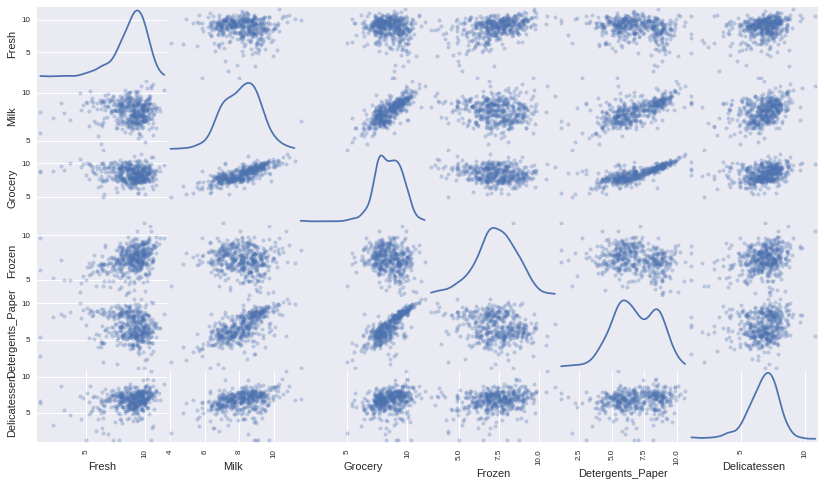

In [111]:

# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log (samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


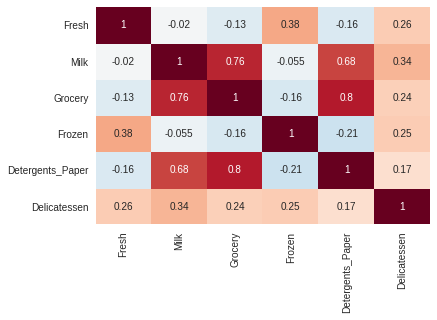

In [112]:
sns.heatmap(log_data.corr(), annot=True,cbar = False)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [113]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.149847  9.019059  8.542081  6.501290          7.492760      7.280008
1  8.743372  6.998510  7.590852  8.258422          6.411818      7.678789
2  9.358243  8.959183  9.404590  8.087025          8.991562      8.015988

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [114]:
# For each feature find the data points with extreme high or low values
outliers = []


for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile (log_data[feature],q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile (log_data[feature],q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    print "step:{:.3f} ".format(step)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = (log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    display (feature_outliers)
    
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers += feature_outliers.index.tolist()
     
    

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)



step:2.534 
Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

step:2.318 
Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

step:2.399 
Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

step:2.349 
Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

step:4.089 
Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

step:2.242 
Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

In [115]:
#import matplotlib.pyplot as plt

seen = set()
duplicate = []

for x in outliers:
    
    if x not in seen :
            
        seen.add(x)
    
    elif x not in duplicate:
         duplicate.append (x) 
    
    else: continue 
    
print duplicate

print "Number of outliers : ", len(outliers)
print "good_data has {} samples with {} features each.".format(*good_data.shape)
#plt.boxplot(log_data)

[154, 65, 75, 66, 128]
Number of outliers :  48
good_data has 398 samples with 6 features each.


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:


"The index of the observations that are outliers for more than one feature should be explicitly reported here."


There are multiple items which are considered outliers due to multiple features. Index list is as follow.


154, 65, 75, 66, 128

These data points required to be removed since clustering algorithms are sensitive to outliers. So, discarding the  values for which IQR is 1.5 times lower or higher than that of Q1 and Q3 value.



**

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4993 -0.0976  0.4109   0.4511 -0.1280   
Dimension 2              0.7252  0.5032  0.5479   0.5363  0.5020   
Dimension 3              0.8301 -0.2420  0.7023   0.5159  0.7690   
Dimension 4              0.9279  0.0247  0.8398   0.5869  0.0557   
Dimension 5              0.9767  0.0361  1.5481   0.9037  0.1228   
Dimension 6              1.0000 -0.0182  1.0304   1.7304  0.1699   

             Detergents_Paper  Delicatessen  
Dimension 1            0.7595        0.1579  
Dimension 2            0.7219        0.6213  
Dimension 3            0.4870        1.1635  
Dimension 4            0.1713        1.7080  
Dimension 5           -0.3016        1.2960  
Dimension 6           -0.5096        1.2866

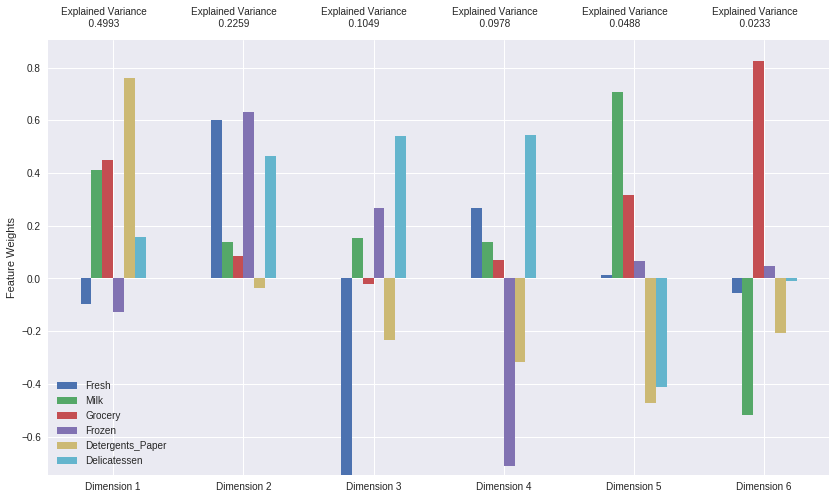

In [129]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6,random_state = 25)
pca.fit (good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# More efficient way to view the total variance explained is by using cumsum method. 
pca_results.cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:

First and Second principal component in total-

First principal Component - 50%
Second principal Component -22%

Total - 72%

First Four principal component in total-

Third principal Component -10%
Fourth principal Component -9%

Total - 91%


First P. Component- It covers 50% of the data. Detergent_Papers has the largest positive weights. On the other hand, Fresh and Frozen has negative weights. Looking at the spending, it might be a small retail shop.

Second P. Component- It covers 22% of the data. It is almost opposite in weight distribution of first component. Detergent_paper has negative weights. Fresh, Frozen have high positive weights. Looking at the 

Third P. Component - It covers 10%. Fresh has large negative weight, followed by Detergent_paper.Delicatessen has the highest positive contribution.

Fourth P. Component- It covers 9%. Frozen has large negative weight, followed by Detergent_paper.Delicatessen has the highest positive contribution.
**

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [117]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.1335      -0.1257      -0.1789       0.8899       0.0844   
1      -1.0691       0.6047       0.7706      -0.2588      -1.1878   
2       2.5291       1.3485       0.1094      -0.2050      -0.5879   

   Dimension 6  
0      -0.5694  
1       0.0163  
2      -0.0808

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4993 -0.0976  0.4109   0.4511  -0.128   
Dimension 2              0.2259  0.6008  0.1370   0.0852   0.630   

             Detergents_Paper  Delicatessen  
Dimension 1            0.7595        0.1579  
Dimension 2           -0.0376        0.4634

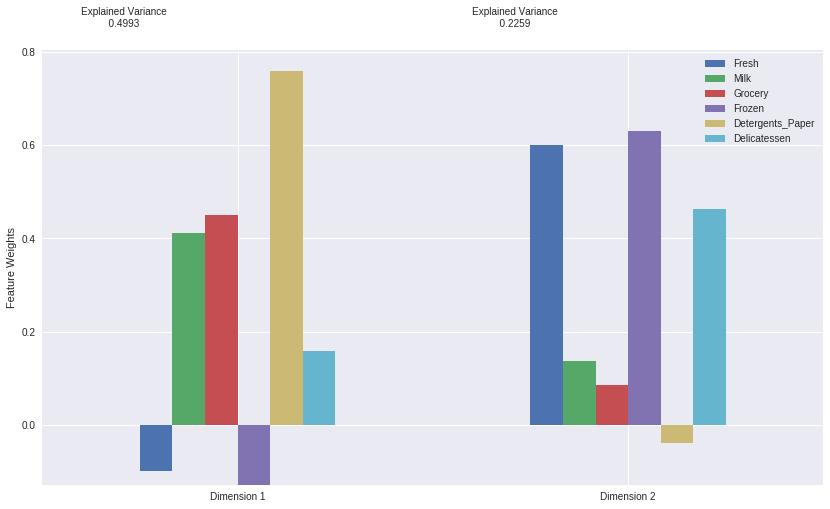

In [118]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2,random_state = 25)
pca.fit (good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Generate PCA results plot
vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [119]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       1.1335      -0.1257
1      -1.0691       0.6047
2       2.5291       1.3485

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

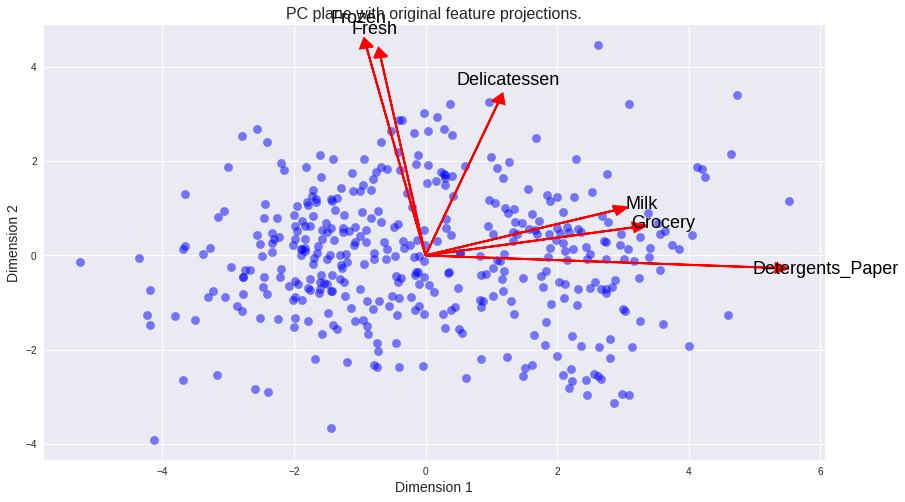

In [120]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:

Advantages-

//KMeans-

Speed - fast and efficient in terms of computational cost, typically O(K*n*d);
Easy to deploy on large number of features.
practically work well even some assumptions are broken;

Ref.-https://www.quora.com/What-are-the-advantages-of-K-Means-clustering


//Gausssian Mixture model-

Speed:	It is the fastest algorithm for learning mixture models
Agnostic:	As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

Gaussian mixture models trained with expectation-maximization algorithm (EM algorithm) maintains probabilistic assignments to clusters, instead of deterministic assignments, and multivariate Gaussian distributions instead of means.

Ref.-http://scikit-learn.org/stable/modules/mixture.html ; https://en.wikipedia.org/wiki/K-means_clustering


Considering the size of the data set, i have decided to deploy both of them. :-)

**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [121]:
# K-MEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def KMeans_clusters(K):
    
    global clusterer, preds, centers, sample_preds
    
# TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=K, random_state=25).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
    reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])
    sample_preds = clusterer.predict(reduced_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')

    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters' 

for k in range(2,16):
    score = KMeans_clusters(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display (results) 

Number of Clusters  Silhouette Score
2                           0.447158
3                           0.364874
4                           0.331151
5                           0.350795
6                           0.362761
7                           0.353794
8                           0.377229
9                           0.367312
10                          0.350868
11                          0.353708
12                          0.357585
13                          0.358898
14                          0.351254
15                          0.348281

In [122]:
import warnings
warnings.filterwarnings("ignore")

# GMM
from sklearn.mixture import GMM

def GMM_clusters(K):
    global clusterer1, preds1, centers1, sample_preds1
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer1 = GMM(n_components=K, random_state=25).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds1 = clusterer1.predict(reduced_data)

# TODO: Find the cluster centers
    centers1 = clusterer1.means_

# TODO: Predict the cluster for each transformed sample data point
    reduced_samples1 = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])
    sample_preds1 = clusterer1.predict(reduced_samples1)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score1 = silhouette_score(reduced_data, preds1)
    
    
    return score1

results1 = pd.DataFrame(columns=['Silhouette Score'])
results1.columns.name = 'Number of Clusters' 

for k in range(2,16):
    score1 = GMM_clusters(k) 
    results1 = results1.append(pd.DataFrame([score1],columns=['Silhouette Score'],index=[k]))

display (results1)    


Number of Clusters  Silhouette Score
2                           0.443601
3                           0.357295
4                           0.291646
5                           0.268398
6                           0.307123
7                           0.302291
8                           0.331284
9                           0.283717
10                          0.221727
11                          0.205907
12                          0.166643
13                          0.188170
14                          0.167910
15                          0.198885

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:
I've tested silhouette score for cluster number 2 to 16 for both KMeans and GMM.

For both the case (KMeans & GMM), cluster number 2 has the best silhouette score.

KMeans - Silhouette score (Cluster 2-4)- 

Number of Clusters 	Silhouette Score
        2 	           0.447158
        3 	           0.364874
        4 	           0.331151

GMM - Silhouette score (Cluster 2 -4)-

Number of Clusters 	Silhouette Score
        2 	          0.443601
        3 	          0.357295
        4 	          0.291646

Update- warnings removed.
**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

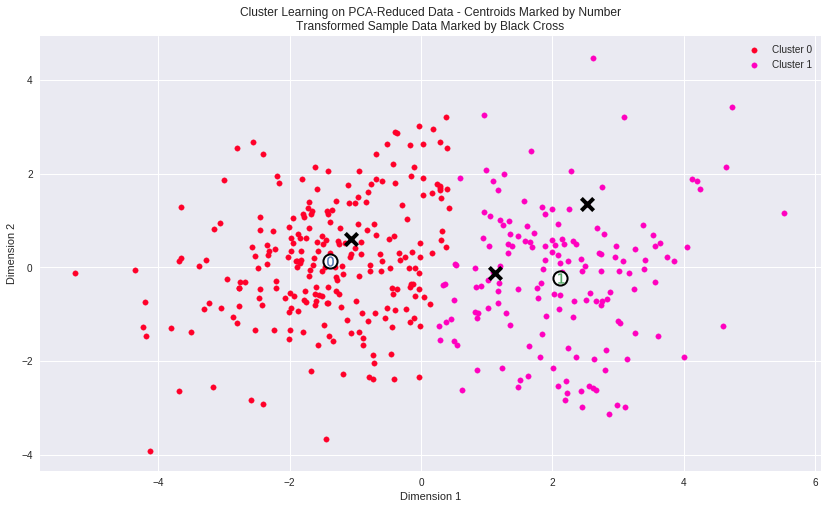

In [123]:
KMeans_clusters(2)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)


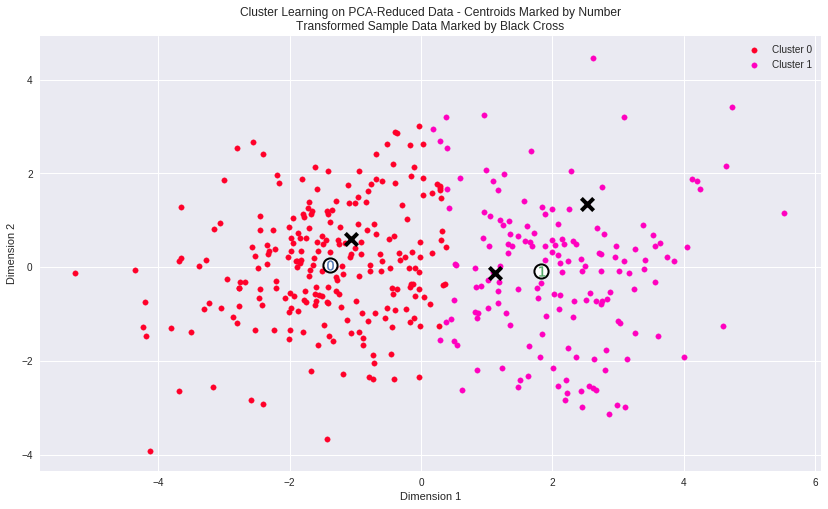

In [124]:
GMM_clusters(2)

vs.cluster_results(reduced_data, preds1, centers1, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [125]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9451.0  1938.0   2449.0  2200.0             307.0         771.0
Segment 1  5424.0  7780.0  11532.0  1123.0            4444.0        1136.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:

Segment 0 - Large consumer of Fresh items and moderate consumer of Frozem items, low consumer of Grocery,Milk, Detergent_Paper, Delicatessen. This is probably representing restaurant/ Cafe.

Segment 1 - This is basically large consumer group who purchased lots of Grocery items, Milk, Delicatessen items. Probably, this group is a retailer/supermarket.

Update- 

"    This section is similar to the very first question(Q1), a direct reference should be made to the statistical description of the data being used to compare to propose establishment representations.
"

//Segment 0 - 

Freash -Higher than Average consumer of Fresh items. Fresh consumption (9451) is higher than median value 8504.

Frozen- higher than average consumer of Frozen items (1938 compared to Median value (1526) , 


Grocery- Low consumption of Grocery item(2449) compared to 25th Percentile (2153).

Milk-Low consumption of Milk item(1938) compared to 25th Percentile (1533).

Detergents_paper- Low consumption (307.0) compared to 25th Percentile (256).

Delicatessen - Medium consumption (771.0) compared to 50th Percentile (965).


Hight than average consumption of Fresh, Frozen and medium consumption of Delicatessen indicates, it's a restaurant/Cafe.

//Segment 1 - 

Freash -low consumer of Fresh items. Fresh consumption (5424) is higher than 25th percentile value (3127) but lower than Median value (8504).

Frozen- Lower consumption of Frozen items (1123) compared to Median value (1526) but higher than 25th percentile (742), 

Grocery- large consumption of Grocery item(11532) compared to 75th Percentile (10655).

Milk-large consumption of Milk item(7780) compared to 75th Percentile (7190).

Detergents_paper- Large consumption (4444) compared to 75th Percentile (3922).

Delicatessen - Medium consumption (1136) compared to median value (965) and 75th Percentile (1820).

Large consumption of Grocery, Milk, Detergent_Paper and Medium consumption of Delicatessen indicates that it's a retailer/supermarket.



Model Output:
              | Fresh   | Milk 	 | Grocery    | Frozen  |Detergents_Paper 	|Delicatessen
    Segment 0 |	9451.0  | 1938.0 | 2449.0     |	 2200.0 | 307.0 	        | 771.0
    Segment 1 |	5424.0  | 7780.0 | 11532.0    |	 1123.0 | 4444.0 	        | 1136.0



                Fresh 	  Milk 	   Grocery 	    Frozen 	  Detergents_Paper 	 Delicatessen
count 	      440.000 	440.000   440.000 	   440.000 	  440.000 	           440.000
mean 	    12000.297 	5796.265  7951.277 	  3071.931 	 2881.493          	  1524.870
std 	    12647.328 	7380.377  9503.162    4854.673 	 4767.854 	          2820.105
min 	        3.000 	  55.000     3.000 	    25.000 	    3.000 	             3.000
25% 	     3127.750 	1533.000  2153.000     742.250 	  256.750 	           408.250
50% 	     8504.000 	3627.000  4755.500    1526.000 	  816.500              965.500
75%      	16933.750 	7190.250 10655.750    3554.250 	 3922.000             1820.250
max 	   112151.000  73498.000 92780.000   60869.000 	40827.000 	         47943.000
    

        Chosen samples of wholesale customers dataset:

                Fresh  |  Milk  |	Grocery   |	Frozen  | Detergents_Paper  |Delicatessen
            0 |	9413   |  8259  |	5126 	  |    666 	| 1795           	| 1451
            1 |	6269   |  1095  |	1980      |   3860 	| 609 	            | 2162
            2 |	11594  |  7779  |	12144 	  |   3252 	| 8035 	            | 3029

        Chosen samples offset from mean of dataset:

                 Fresh |  Milk  | 	Grocery   |	Frozen 	| Detergents_Paper 	|Delicatessen
            0 | -2587.0|  2463.0| 	-2825.0   |	-2406.0 | -1086.0 	        |   -74.0
            1 | -5731.0| -4701.0| 	-5971.0   |	  788.0 | -2272.0 	        |   637.0
            2 | -406.0 |  1983.0| 	4193.0 	  |   180.0 |  5154.0 	        |  1504.0

        Chosen samples offset from median of dataset:

                Fresh  |  Milk 	|  Grocery 	  | Frozen 	| Detergents_Paper 	|Delicatessen
            0 |	909.0  | 4632.0 |	370.0 	  | -860.0 	|  979.0 	        |   485.0
            1 |	-2235.0|-2532.0 | -2776.0 	  | 2334.0 	| -207.0 	        |  1196.0
            2 |	3090.0 | 4152.0 |  7388.0 	  | 1726.0 	| 7219.0 	        |  2063.0


**

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [128]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:


iNDEX 5[0]- 

Assumption- This is representing probably a Retailer/Supermarket. 

Model prediction- Cluster -1 / high consumer group.

Model prediction is consistent with the assumption.


iNDEX 50[1]- This is representing probably a  Restaurant. 

Model prediction- Cluster-0 / Low consumer group.

Model prediction is consistent with the assumption.


iNDEX 100[2]-This is representing probably a Retailer/super market. 

Model prediction- Cluster -1 / high consumer group.

Model prediction is consistent with the assumption.


**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:

First, let's assume that changing the delivery schedule (from 5 days a week to 3 days a week) will impact positively to both the customer segments. In favor of this, following are the reasons-

1. Segment 1/high consumer group- Considering the volume of consumption of different items, this segment will be less impacted/no impact at all. At best, the quantity will be increased will be higher in each delivery. Also, reducing delivery frequency will increase the productivity of this segment since people will be less engazed in receving, restocking, reorganizing items.

2. Segment 0/low consumer group - Again, increasing quantity per delivery would reduce impact on this category as well.

Now, the critical part is, whoever (in any segment) is taking fresh items (large/small) quantity will be severly impacted since they will not get fresh items regularly.


Update - 
'what is expected in this section is to describe the process of implementing an A/B test, would we for example, try this on all of the data? or on segments? and how many in each segment. I would suggest reading the link included A/B tests and how they're performed.
'

for A/B testing, we need to following the below steps-

Step 1- identify the target/testing group and control group.

Target/testing group - it should be a random segment from each customer segment. However, considering the impact of Fresh item we need to segregate the target group in two categories- high fresh item consumer and low fresh item consumer.

example -
                            High Fresh consumer | Low fresh consumer
    Total target group - 50        40           |     10 


Target group size- we will use 80:20 rule here. Put 80% on the target group as per above segmentation (high/low fresh consumer segment). Apply this to each customer segment (cluster 0 and cluster 1).


Control group- we will use rest 20% left in  each customer segment (high/low fresh consumer group from each cluster).


Step 2 - Run the test. Change the delivery schedule to 3 days for the target/test group. Keep the delivery schedule as is (5 days a week) for the control group.

Testing time - run the test for at least 2 to 3 weeks in a row. Start and finish the test on the same day of the week. We can run the test for 1 week but there is a chance of receiving false positive feedback from the customers.

Step 3 - Take the feedback from the customer from both target/testing group and the control group.

Step 4 - analyse the feedback - positive, negative or no feedback. To compare the feedback, feed the result in a statistical model to find out the statistical significance. Our target would be to reach 95% statistical significance.

Step 5- based on the statistical significance output, decide whether changing delivery schedule is a success or failure. High statistical significance refers to positive change for customer.

Step 6 - Repeat the process (Step 1 -5), if necessary.

Ref. -
https://en.wikipedia.org/wiki/A/B_testing
https://conversionxl.com/ab-testing-statistics/
http://www.evanmiller.org/how-not-to-run-an-ab-test.html
https://conversionxl.com/12-ab-split-testing-mistakes-i-see-businesses-make-all-the-time/

**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:

Update-
'While it is true that we may do this and build a supervised learning model to predict new customer segments(and this is a validly correct answer), note that we already have a model that can do this, namely the unsupervised learning model we just built in this section. What we can do here is to use the predicted labels as an input feature to a supervised learning model to predict something else we may find useful, here the segments may be considered as an engineered feature (which we know is one of many potent ways of improving the predictive capabilities of a model). This is just something to think about.
https://en.wikipedia.org/wiki/Feature_engineering
'

Rephrasing the previous statement-

Approach-
We will use both unsupervised and supervised clustering approach in the same model sequentially. 

Step- 1:
First, we will use the unsupervised model to predict the customer segment. We can use KMeans or GMM to predict the customer segment. 


Step-2:
Use Customer segment as a new feature and use it as an input to the second model, which is a supervised clustering model.

Step-3:
Using the supervised model, predict the correct customer segment for the new customers. 

**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

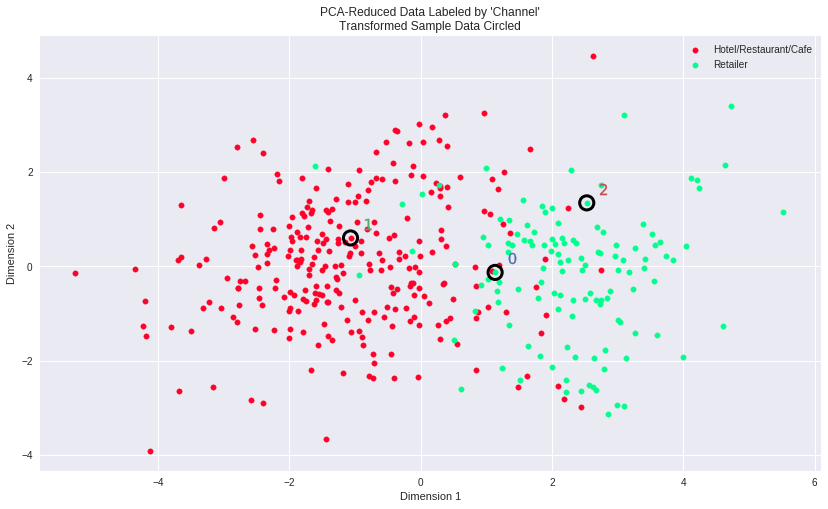

In [127]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:

Comparison- 

iNDEX 5[0]- 
Assumption- This is representing probably a Retailer/Supermarket. 
Model prediction- Cluster -1 / high consumer group.
Channel - Retailer.

iNDEX 50[1]- This is representing probably a  Restaurant. 
Model prediction- Cluster-0 / Low consumer group.
Channel -Hotel/Restaurant/Cafe.

iNDEX 100[2]-This is representing probably a Retailer/super market. 
Model prediction- Cluster -1 / high consumer group.
Channel - Retailer

Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 

No. Customer segments are not clearly separable.


Would you consider these classifications as consistent with your previous definition of the customer segments?
Yes. It is consistent with the previous defination.

Update-
Would you consider these classifications as consistent with your previous definition of the customer segments?


Yes, as of now, model prediction is consistent with the previous assumption of customer segmentation. However, it is not purely consistant. My assumption of customer segmentation is biased to Fresh, Frozen, Milk items consumption. Higher consumption on these items is leading to a customer segment of HRC (Hotel/Restaurant/Cafe). Very high consumption of all items or most of the items will lead to Retailer/Supermarket. But this is not the practical scenario. A large hotel might or large restaurant can consume large quantity of items (similar to retailer/supermarket) and vice versa. This is also reflected on the clustering information based on channel information. 

**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.